# Explore here

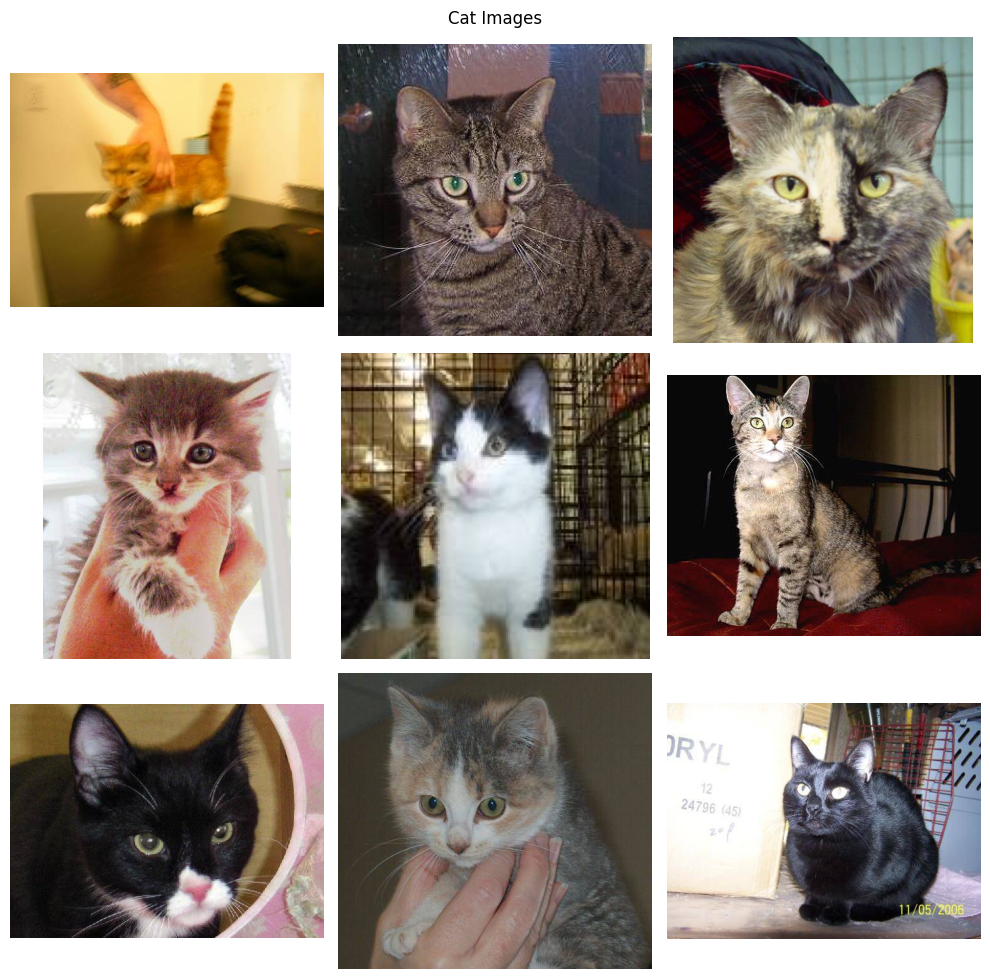

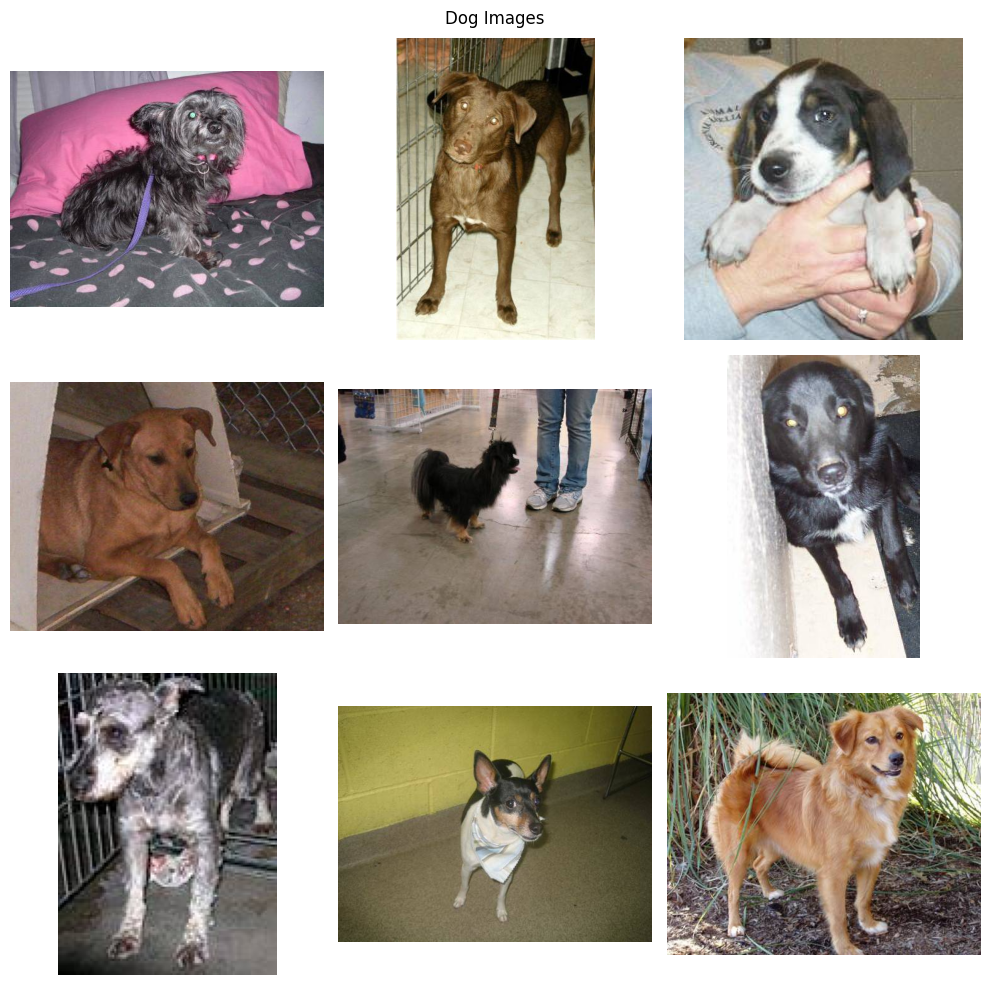

In [1]:
# Your code here
import matplotlib.pyplot as plt
import os
from PIL import Image


train_dir = "../data/raw/train"
test_dir = "../data/raw/test"


def show_images_by_label(image_dir, label, title):


    label_dir = os.path.join(image_dir, label)
    

    images = sorted(os.listdir(label_dir))[:9]  
    if not images:
        print(f"No images found in {label_dir}")
        return

    plt.figure(figsize=(10, 10))
    for i, img_name in enumerate(images):
        img_path = os.path.join(label_dir, img_name)
        try:
            img = Image.open(img_path)
            plt.subplot(3, 3, i + 1)
            plt.imshow(img)
            plt.axis('off')
        except Exception as e:
            print(f"Error opening image {img_name}: {e}")
            continue
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


show_images_by_label(image_dir=train_dir, label="cat", title="Cat Images")
show_images_by_label(image_dir=train_dir, label="dog", title="Dog Images")



In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BINARY = 'binary'
TARGET_SIZE = (200, 200)
BATCH_SIZE = 16


train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

trdata = train_datagen.flow_from_directory(
    train_dir,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode=BINARY,
    subset='training',
    classes = ["dog", "cat"] 
)

tsdata = train_datagen.flow_from_directory(
    train_dir,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode=BINARY,
    subset='validation',
    classes = ["test"]
)


2025-03-17 00:08:04.773786: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-17 00:08:04.776847: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-17 00:08:04.785218: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742170084.799001   32141 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742170084.803176   32141 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742170084.816002   32141 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Found 20000 images belonging to 2 classes.
Found 0 images belonging to 1 classes.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input

model = Sequential()

model.add(Input(shape=(200, 200, 3)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

model.summary()


model.save("../models/basic_model.keras")


2025-03-17 00:08:08.776186: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 200, 200, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 100, 100, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 50, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 25, 25, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    75,501,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,001,665 (408.18 MB)

 Trainable params: 107,001,665 (408.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import keras
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss= keras.losses.binary_crossentropy,
    metrics=['accuracy']
)

history = model.fit(
    trdata,
    steps_per_epoch=len(trdata),
    epochs=2,
    validation_data=tsdata,
    validation_steps=len(tsdata)
)

   8/1250 ━━━━━━━━━━━━━━━━━━━━ 2:55:15 8s/step - accuracy: 0.5204 - loss: 148.7624

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(
    "../models/best_model.keras",
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=False,
    mode="auto",             
    verbose=1
)

In [ ]:
early_stopping = EarlyStopping(
    monitor="val_accuracy",     
    patience=3,
    mode="auto",           
    restore_best_weights=True,
    verbose=1
)

In [ ]:
history = model.fit(
    trdata,
    steps_per_epoch=100,
    epochs=3,
    validation_data=tsdata,
    validation_steps=10,
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.4869 - loss: 0.7270 

/home/vscode/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.44375, saving model to ../models/best_model.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 1114s 11s/step - accuracy: 0.4870 - loss: 0.7267 - val_accuracy: 0.4437 - val_loss: 0.6940
Epoch 2/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.5285 - loss: 0.6932 
Epoch 2: val_accuracy improved from 0.44375 to 0.46250, saving model to ../models/best_model.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 1119s 11s/step - accuracy: 0.5283 - loss: 0.6932 - val_accuracy: 0.4625 - val_loss: 0.6939
Epoch 3/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.4673 - loss: 0.6937 
Epoch 3: val_accuracy improved from 0.46250 to 0.51250, saving model to ../models/best_model.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 1159s 12s/step - accuracy: 0.4676 - loss: 0.6937 - val_accuracy: 0.5125 - val_loss: 0.6929
Restoring model weights from the end of the best epoch: 3.


In [ ]:
from tensorflow.keras.models import load_model

best_model = load_model("../models/best_model.keras")

In [ ]:
val_loss, val_acc = best_model.evaluate(tsdata)
print(f"Validation loss: {val_loss:.2f}")
print(f"Validation accuracy: {val_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 764s 2s/step - accuracy: 0.4982 - loss: 0.6932
Pérdida en validación: 0.69
Precisión en validación: 0.50


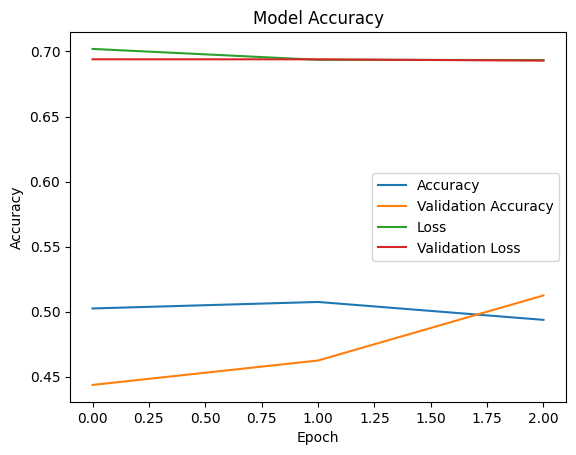

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

plt.show()